## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 1*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------

Leer la sección 9.4 sobre el operador Hit or Miss. Explicar con sus propias palabras cómo funciona este operador, y cómo se construye la operación A ∗ B a partir de las operaciones básicas de dilatación, erosión, opening, closing y diferencia.

Mostrar un ejemplo con una imagen binaria de su elección en donde se muestre que el operador Hit or Miss detecta la localización de un (o varios) objetos específicos dentro de una imagen binaria I.

------------

#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### *Operador Hit or Miss*

El operador Hit or Miss es una herramienta de morfología matemática utilizada en el procesamiento de imágenes, especialmente útil en imágenes binarias. Este operador es capaz de identificar patrones específicos en una imagen. Funciona utilizando dos estructuras de elementos: uno para el "hit" (golpe) y otro para el "miss" (fallo).


El operador se define de la siguiente manera: 
A⊗B = (A⊖B_1) ∩ (A^c ⊖B_2)

Donde:
- A es la imagen original.
- B = (B_1, B_2), es una pareja de elementos estructurantes, donde B_1 es usado para la erosión de A y B_2 es usado para la erosión del complemento de A (A^c)
- ⊖ representa la operación de erosión.
- ∩ representa la intersección de dos conjuntos.

En términos más simples, el operador busca donde la estructura B_1 encaja dentro de la imagen A (hit) y donde la estructura 
B_2 no encaja en el complemento de A (miss). El resultado es un conjunto de puntos donde ambos condiciones son verdaderas. 

Codigo basado en algoriutmo de GeeksForGeeks: https://www.geeksforgeeks.org/mahotas-hit-miss-transform/

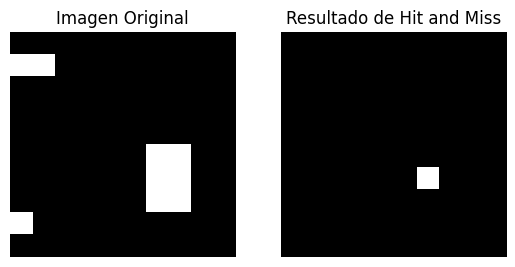

In [5]:
def erode(image, structure):
    s_center = (structure.shape[0] // 2, structure.shape[1] // 2)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = [(i + di - s_center[0], j + dj - s_center[1]) 
                         for di in range(structure.shape[0]) 
                         for dj in range(structure.shape[1]) 
                         if structure[di, dj] == 1]

            output[i, j] = all(image[x, y] == 1 if 0 <= x < image.shape[0] and 0 <= y < image.shape[1] else False 
                               for x, y in neighbors)

    return output

def hit_and_miss(image, structure1, structure2):

    eroded1 = erode(image, structure1)
    eroded2 = erode(1 - image, structure2)
    return np.logical_and(eroded1, eroded2)

# Crear imagen y elementos estructurantes
regions = np.zeros((10, 10), bool)
regions[1, :2] = 1
regions[5:8, 6:8] = 1
regions[8, 0] = 1

# Elemento estructurante para "hit"
template1 = np.array([[0, 1, 1], [0, 1, 1], [0, 1, 1]])

# Elemento estructurante para "miss"
template2 = 1 - template1

# Aplicar transformación de hit-and-miss
result = hit_and_miss(regions, template1, template2)

# Visualizar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(regions, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Visualizar el resultado de hit-and-miss
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Resultado de Hit and Miss')
plt.axis('off')

plt.show()


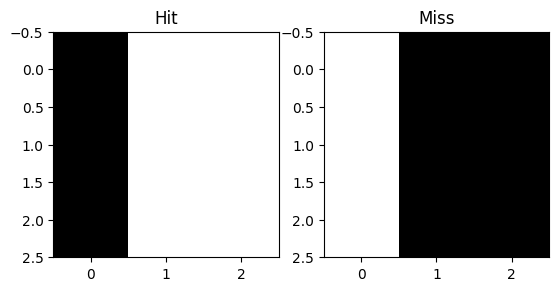

In [3]:
# Visualizar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(template1, cmap='gray')
plt.title('Hit')

# Visualizar el resultado de hit-and-miss
plt.subplot(1, 2, 2)
plt.imshow(template2, cmap='gray')
plt.title('Miss')

plt.show()

El elemento estructurante para "hit" estaba diseñado para detectar el rectángulo blanco a la derecha. El elemento estructurante para "miss" estaba diseñado para detectar el fondo o el espacio donde no se desea que haya coincidencias, típicamente alrededor de la estructura que se busca con el "hit". 

En la imagen de resultado de Hit and Miss, se muestra un pequeño cuadrado blanco en la parte inferior derecha. Este resultado tiene sentido si consideramos la forma y el tamaño de los elementos estructurantes utilizados en el operador Hit and Miss y cómo estos interactúan con la imagen original.

El cuadrado blanco en el resultado indica la única posición en la imagen original donde el elemento estructurante de "hit" encontró una coincidencia exacta (todos los píxeles donde B1 tiene unos coinciden con unos en la imagen original) y el elemento estructurante de "miss" también encontró una coincidencia exacta en el complemento de la imagen (todos los píxeles donde B2 tiene unos coinciden con ceros en la imagen original). Esto significa que en esa posición específica, el patrón de la imagen original coincide exactamente con el patrón que el operador Hit and Miss estaba diseñado para detectar.